<a href="https://colab.research.google.com/github/Azbqqq/azbqqq/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [40]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()


In [41]:
X_train=X_train/255
X_test=X_test/255


In [75]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
X_train_flattened= X_train.reshape(len(X_train), 28*28)

In [44]:
X_test_flattened= X_test.reshape(len(X_test), 28*28)

In [22]:
X_test_flattened.shape

(10000, 784)

In [65]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8730 - loss: 0.4521
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9622 - loss: 0.1301
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9744 - loss: 0.0860
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9810 - loss: 0.0629
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0491
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9882 - loss: 0.0386
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9898 - loss: 0.0324
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0245
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9939 - loss: 0.0198
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0163
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0144
Epoch 12/25
1875/1875 ━━━━━━

In [68]:
  model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.1421


[0.11568500846624374, 0.9771999716758728]

In [71]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

In [72]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    1,    0,    3,    1,    1,    1],
       [   0, 1122,    4,    0,    0,    0,    3,    2,    4,    0],
       [   6,    1, 1007,    4,    1,    0,    0,    4,    7,    2],
       [   0,    1,    3,  993,    0,    5,    1,    4,    3,    0],
       [   0,    0,    3,    1,  965,    0,    6,    1,    3,    3],
       [   1,    0,    0,   21,    2,  859,    2,    0,    6,    1],
       [   4,    3,    3,    1,    6,    7,  933,    0,    1,    0],
       [   1,    5,    8,    3,    2,    0,    0,  998,    5,    6],
       [   5,    0,    2,    6,    5,    5,    1,    2,  943,    5],
       [   3,    3,    0,    9,    8,    3,    0,    7,    6,  970]],
      dtype=int32)>

Text(158.22222222222223, 0.5, 'Truth')

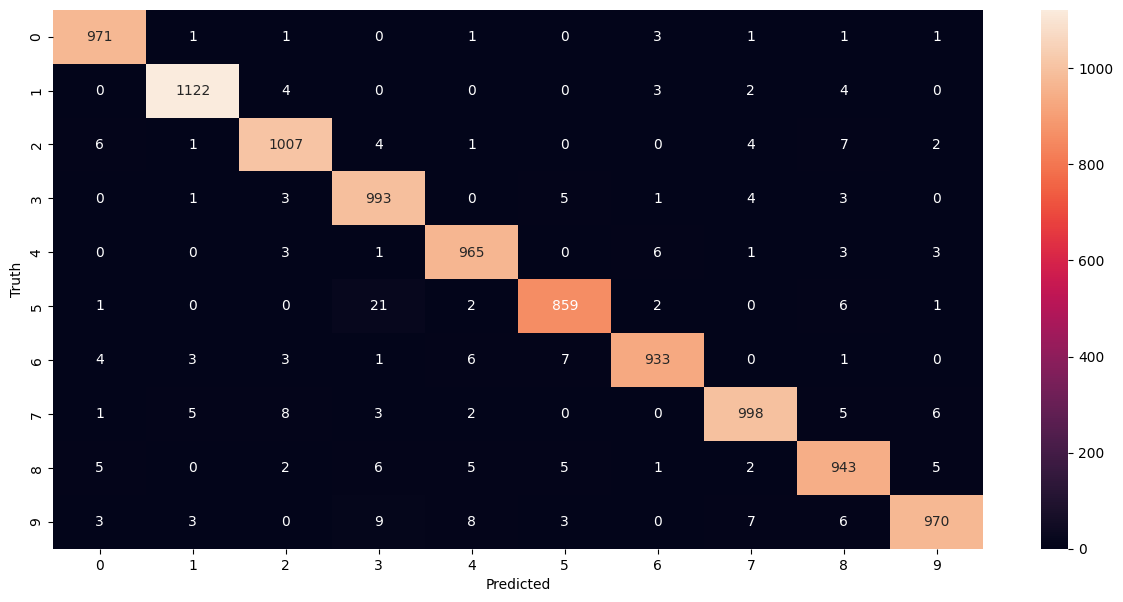

In [74]:
import seaborn as sn
plt.figure(figsize=(15,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')